In [5]:
from tensorflow.data import Dataset
from tensorflow.io import read_file , decode_jpeg
from tensorflow.image import resize 
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from matplotlib.pyplot import imshow , imread
from tensorflow.keras.layers import Dense , Flatten , Input , Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.losses import BinaryCrossentropy
from tensorflow.keras.optimizers import Adam

In [6]:
from tensorflow.keras.applications import MobileNetV3Small
from tensorflow.keras.applications.mobilenet_v3 import preprocess_input

In [7]:
datagen = ImageDataGenerator(
                             rotation_range=90 ,
                             brightness_range=[.5 , 1] ,
                             zoom_range=[.4,1],
                             vertical_flip= True,
                             horizontal_flip= True,
                            validation_split=.2,
                            )

In [8]:
train = datagen.flow_from_directory('data' ,
                                target_size = (224,224),
                                 shuffle = True,
                                 seed = 12,
                                 batch_size=10,
                                 subset = "training",
                                    class_mode = 'binary'
                            
                                   )

test = datagen.flow_from_directory(r'data' ,
                                target_size = (224,244),
                                 shuffle = True,
                                 seed = 12,
                                 batch_size=6,
                                subset="validation",
                                class_mode = 'binary'
                                  )

Found 60 images belonging to 2 classes.
Found 14 images belonging to 2 classes.


In [9]:
def model ():
    inp = Input(shape = (224,224,3))
    inp = preprocess_input(inp)
    
    mobV3 = MobileNetV3Small(input_shape= (224 , 224 , 3) , include_top=False )
    mobV3.trainable = False
    emb = mobV3(inp)
    flata = Flatten()(emb)
    drop  = Dropout(.5)(flata)
    OUT = Dense(1 , 'sigmoid')(drop)
    return   Model(inputs = inp , outputs  = OUT)

In [10]:
len(train)

6

In [11]:
MOBILE = model()

In [12]:
MOBILE.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 MobilenetV3small (Functiona  (None, 7, 7, 576)        939120    
 l)                                                              
                                                                 
 flatten (Flatten)           (None, 28224)             0         
                                                                 
 dropout (Dropout)           (None, 28224)             0         
                                                                 
 dense (Dense)               (None, 1)                 28225     
                                                                 
Total params: 967,345
Trainable params: 28,225
Non-trainable params: 939,120
__________________________________________________

In [14]:
MOBILE.compile(optimizer=Adam(0.001) , loss = BinaryCrossentropy() , metrics=['accuracy']) 

In [15]:
MOBILE.fit(train,epochs = 10,validation_data= test ,steps_per_epoch=6)

Epoch 1/10
6/6 [==============================] - 7s 657ms/step - loss: 0.9260 - accuracy: 0.7167 - val_loss: 0.0761 - val_accuracy: 1.0000
Epoch 2/10
6/6 [==============================] - 2s 418ms/step - loss: 0.6965 - accuracy: 0.8167 - val_loss: 1.3599 - val_accuracy: 0.7143
Epoch 3/10
6/6 [==============================] - 3s 449ms/step - loss: 0.2108 - accuracy: 0.9333 - val_loss: 0.3086 - val_accuracy: 0.8571
Epoch 4/10
6/6 [==============================] - 3s 411ms/step - loss: 0.2367 - accuracy: 0.9333 - val_loss: 0.3132 - val_accuracy: 0.8571
Epoch 5/10
6/6 [==============================] - 3s 439ms/step - loss: 0.2533 - accuracy: 0.9167 - val_loss: 1.0068 - val_accuracy: 0.8571
Epoch 6/10
6/6 [==============================] - 3s 430ms/step - loss: 0.0887 - accuracy: 0.9667 - val_loss: 0.6131 - val_accuracy: 0.7143
Epoch 7/10
6/6 [==============================] - 3s 441ms/step - loss: 0.0363 - accuracy: 1.0000 - val_loss: 0.3055 - val_accuracy: 0.7857
Epoch 8/10
6/6 [====

In [50]:
from tensorflow import cast , expand_dims

In [45]:
def read_the_image(data):
    img = read_file(data)
    img = decode_jpeg(img)          # RGB image
    img = resize(img , (224 , 224))
    img = preprocess_input(img)
    img = cast(img , 'uint8')
    return img

In [61]:
import os

In [62]:
MOBILE(expand_dims(read_the_image(qasem[1]),axis = 0))

<tf.Tensor: shape=(1, 1), dtype=float32, numpy=array([[0.7800379]], dtype=float32)>

In [24]:
qasem = os.listdir("teste")
qasem  = list(map(lambda x : os.path.join('teste' , x) , qasem))

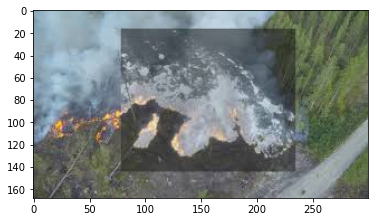

In [57]:
imshow(imread(qasem[3]))